In [2]:
#author: Ameya Naik

import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
indicator_df  = pd.read_csv("D:\MOOC_Courses\Youtube_Projects\WorldDevelopmentIndicator\Archive\Indicators.csv");
indicator_df.info();
indicator_df.head();
indicator_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


(5656458, 6)

In [4]:
indicator_df.isnull().any()


countries = indicator_df['CountryName'].unique().tolist();
len(countries)
indicators = indicator_df['IndicatorName'].unique().tolist();
len(indicators);
years = indicator_df['Year'].unique().tolist();
len(years);
print(min(years), '-',max(years))

1960 - 2015


In [5]:
indicator_df.columns;

indicator_df.set_index('CountryCode',inplace = True, drop = False);

indicator_df.drop(['HIC', 'OEC', 'OED', 'NOC', 'CEB', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'LCN', 'FCS', 'LAC', 'LMY', 'MEA', 'MNA', 'MIC', 'NAC', 'SSF', 'UMC', 'SSA', 'LMC', 'EAS', 'HPC', 'LDC', 'LIC'], axis=0);
indicator_df.reset_index(drop=True)
co2_emission =indicator_df[indicator_df['IndicatorCode'].str.contains('EN.ATM.CO2E.KT')];
print(co2_emission.head())

                                         CountryName CountryCode  \
CountryCode                                                        
ARB                                       Arab World         ARB   
CSS                           Caribbean small states         CSS   
CEB                   Central Europe and the Baltics         CEB   
EAS          East Asia & Pacific (all income levels)         EAS   
EAP            East Asia & Pacific (developing only)         EAP   

                  IndicatorName   IndicatorCode  Year         Value  
CountryCode                                                          
ARB          CO2 emissions (kt)  EN.ATM.CO2E.KT  1960  5.956399e+04  
CSS          CO2 emissions (kt)  EN.ATM.CO2E.KT  1960  5.878201e+03  
CEB          CO2 emissions (kt)  EN.ATM.CO2E.KT  1960  4.674500e+05  
EAS          CO2 emissions (kt)  EN.ATM.CO2E.KT  1960  1.211359e+06  
EAP          CO2 emissions (kt)  EN.ATM.CO2E.KT  1960  8.541146e+05  


In [6]:
gdp_percapita =indicator_df[indicator_df['IndicatorCode'].str.contains('NY.GDP.PCAP.CD')];
print(gdp_percapita.head());


# get the years
years = co2_emission['Year'].values
# get the values
co2 = co2_emission['Value'].values


                                           CountryName CountryCode  \
CountryCode                                                          
CSS                             Caribbean small states         CSS   
EAS            East Asia & Pacific (all income levels)         EAS   
EAP              East Asia & Pacific (developing only)         EAP   
EMU                                          Euro area         EMU   
ECS          Europe & Central Asia (all income levels)         ECS   

                            IndicatorName   IndicatorCode  Year       Value  
CountryCode                                                                  
CSS          GDP per capita (current US$)  NY.GDP.PCAP.CD  1960  457.464712  
EAS          GDP per capita (current US$)  NY.GDP.PCAP.CD  1960  146.814138  
EAP          GDP per capita (current US$)  NY.GDP.PCAP.CD  1960   89.319639  
EMU          GDP per capita (current US$)  NY.GDP.PCAP.CD  1960  924.571393  
ECS          GDP per capita (current US$)

Text(0, 0.5, 'CO2Emssion per kIlo Tons ')

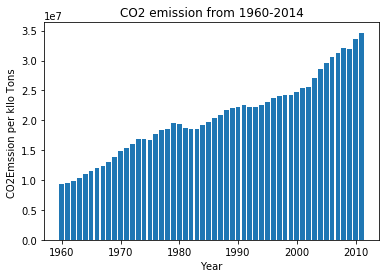

In [7]:
# create
plt.bar(years,co2)
plt.title("CO2 emission from 1960-2014")
plt.xlabel("Year")
plt.ylabel("CO2Emssion per kIlo Tons ")

In [8]:
#get the years
years = gdp_percapita['Year'].values
# get the values
co2 = gdp_percapita['Value'].values

Text(0, 0.5, 'GDP per capita ')

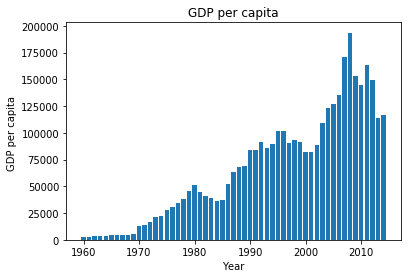

In [9]:
#create
plt.bar(years,co2)
plt.title("GDP per capita")
plt.xlabel("Year")
plt.ylabel("GDP per capita ")


In [10]:
#Filter for Belgium 
co2_emission_BEL = co2_emission[co2_emission['CountryCode'].str.contains('BEL')];
years = co2_emission_BEL['Year'].values
co2_BEL = co2_emission_BEL['Value'].values


In [11]:
#Filter for USA 
co2_emission_USA = co2_emission[co2_emission['CountryCode'].str.contains('USA')];
co2_UAS = co2_emission_USA['Value'].values
years = co2_emission_USA['Year'].values


In [12]:
#Filter for INDIA 
co2_emission_IND = co2_emission[co2_emission['CountryCode'].str.contains('IND')];
years = co2_emission_IND['Year'].values
co2_IND = co2_emission_IND['Value'].values

In [13]:
#Filter for Germany 
co2_emission_DEU = co2_emission[co2_emission['CountryCode'].str.contains('DEU')];
years = co2_emission_DEU['Year'].values
co2_DEU = co2_emission_DEU['Value'].values


ValueError: x and y must have same first dimension, but have shapes (21,) and (52,)

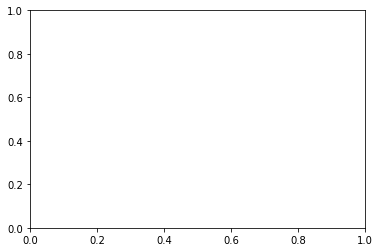

In [14]:
plt.plot(years,co2_UAS, label = "USA")

plt.plot(years,co2_DEU, label = "DEU" )
plt.plot(years,co2_IND, label = "India")
plt.xlabel('Years')
plt.ylabel('CO in tonnes')
plt.legend()
plt.show()

In [15]:
co2_emission =indicator_df[indicator_df['IndicatorCode'].str.contains('EN.ATM.CO2E.KT')];
co2_emission.set_index('CountryCode',inplace = True, drop = False);
co2_emission = co2_emission.drop(['WLD','ARB','HIC', 'OEC', 'OED', 'NOC', 'CEB', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'LCN', 'FCS', 'LAC', 'LMY', 'MEA', 'MNA', 'MIC', 'NAC', 'SSF', 'UMC', 'SSA', 'LMC', 'EAS', 'HPC', 'LDC', 'LIC'], axis=0);
co2_emission = co2_emission.reset_index(drop=True)
co2_emission = co2_emission.sort_values('Value',ascending = False)
co2_emission2014 = co2_emission[co2_emission['Year'] == 2011]
print(co2_emission2014.head(10));
co2_emission1960 = co2_emission[co2_emission['Year'] == 1960]
print(co2_emission1960.head(10));

             CountryName CountryCode       IndicatorName   IndicatorCode  \
9119               China         CHN  CO2 emissions (kt)  EN.ATM.CO2E.KT   
9270       United States         USA  CO2 emissions (kt)  EN.ATM.CO2E.KT   
9080          South Asia         SAS  CO2 emissions (kt)  EN.ATM.CO2E.KT   
9163               India         IND  CO2 emissions (kt)  EN.ATM.CO2E.KT   
9229  Russian Federation         RUS  CO2 emissions (kt)  EN.ATM.CO2E.KT   
9171               Japan         JPN  CO2 emissions (kt)  EN.ATM.CO2E.KT   
9149             Germany         DEU  CO2 emissions (kt)  EN.ATM.CO2E.KT   
9177         Korea, Rep.         KOR  CO2 emissions (kt)  EN.ATM.CO2E.KT   
9165  Iran, Islamic Rep.         IRN  CO2 emissions (kt)  EN.ATM.CO2E.KT   
9164           Indonesia         IDN  CO2 emissions (kt)  EN.ATM.CO2E.KT   

      Year        Value  
9119  2011  9019518.215  
9270  2011  5305569.614  
9080  2011  2328350.649  
9163  2011  2074344.893  
9229  2011  1808073.022  
9171  2

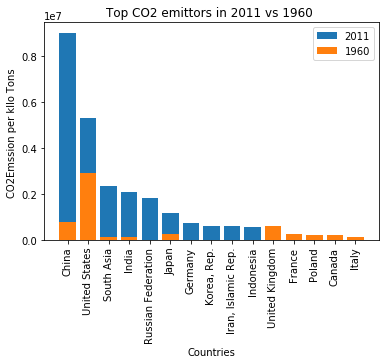

In [16]:
plt.bar(co2_emission2014['CountryName'].head(10),co2_emission2014['Value'].head(10),label = "2011" )
plt.bar(co2_emission1960['CountryName'].head(10),co2_emission1960['Value'].head(10),label = "1960")
plt.title("Top CO2 emittors in 2011 vs 1960 ")
plt.xlabel("Countries")
plt.ylabel("CO2Emssion per kIlo Tons ")
plt.xticks(rotation = 90)
plt.legend()


In [17]:
gdp_percapita =indicator_df[indicator_df['IndicatorCode'].str.contains('NY.GDP.PCAP.CD')];
gdp_percapita.set_index('CountryCode',inplace = True, drop = False);
gdp_percapita = gdp_percapita.drop(['WLD','ARB','HIC', 'OEC', 'OED', 'NOC', 'CEB', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'LCN', 'FCS', 'LAC', 'LMY', 'MEA', 'MNA', 'MIC', 'NAC', 'SSF', 'UMC', 'SSA', 'LMC', 'EAS', 'HPC', 'LDC', 'LIC'], axis=0);
gdp_percapita = gdp_percapita.reset_index(drop=True)
gdp_percapita = gdp_percapita.sort_values('Value',ascending = False)
gdp_percapita2011 = gdp_percapita[gdp_percapita['Year'] == 2011]
print(gdp_percapita2011.head(10));
gdp_percapita1960 = co2_emission[co2_emission['Year'] == 1960]
print(gdp_percapita1960.head(10));

           CountryName CountryCode                 IndicatorName  \
8338            Monaco         MCO  GDP per capita (current US$)   
8321     Liechtenstein         LIE  GDP per capita (current US$)   
8323        Luxembourg         LUX  GDP per capita (current US$)   
8350            Norway         NOR  GDP per capita (current US$)   
8362             Qatar         QAT  GDP per capita (current US$)   
8388       Switzerland         CHE  GDP per capita (current US$)   
8239           Bermuda         BMU  GDP per capita (current US$)   
8324  Macao SAR, China         MAC  GDP per capita (current US$)   
8228         Australia         AUS  GDP per capita (current US$)   
8267           Denmark         DNK  GDP per capita (current US$)   

       IndicatorCode  Year          Value  
8338  NY.GDP.PCAP.CD  2011  163351.646686  
8321  NY.GDP.PCAP.CD  2011  157092.969387  
8323  NY.GDP.PCAP.CD  2011  113239.560972  
8350  NY.GDP.PCAP.CD  2011  100575.117263  
8362  NY.GDP.PCAP.CD  2011   89

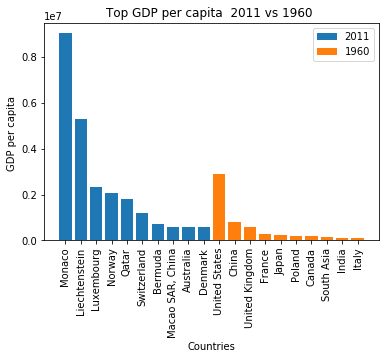

In [18]:
plt.bar(gdp_percapita2011['CountryName'].head(10),co2_emission2014['Value'].head(10),label = "2011" )
plt.bar(gdp_percapita1960['CountryName'].head(10),co2_emission1960['Value'].head(10),label = "1960")
plt.title("Top GDP per capita  2011 vs 1960 ")
plt.xlabel("Countries")
plt.ylabel("GDP per capita ")
plt.xticks(rotation = 90)
plt.legend()